In [3]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import pandas.util.testing as tm
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import types

import warnings
warnings.filterwarnings('ignore')

In [4]:
# The code was removed by Watson Studio for sharing.

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
df.shape

(2938, 22)

In [7]:
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
df=df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})
list(df.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

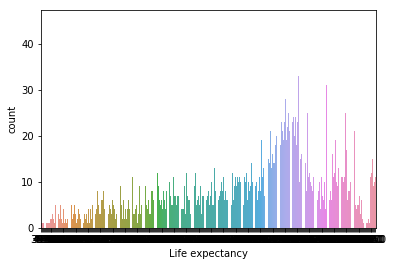

In [9]:
sns.countplot(df['Life expectancy'])

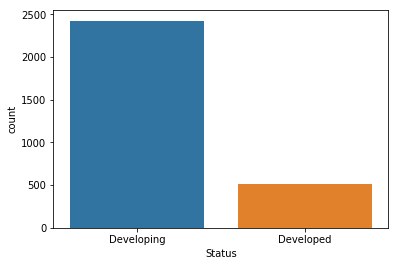

In [10]:
sns.countplot(df['Status'])

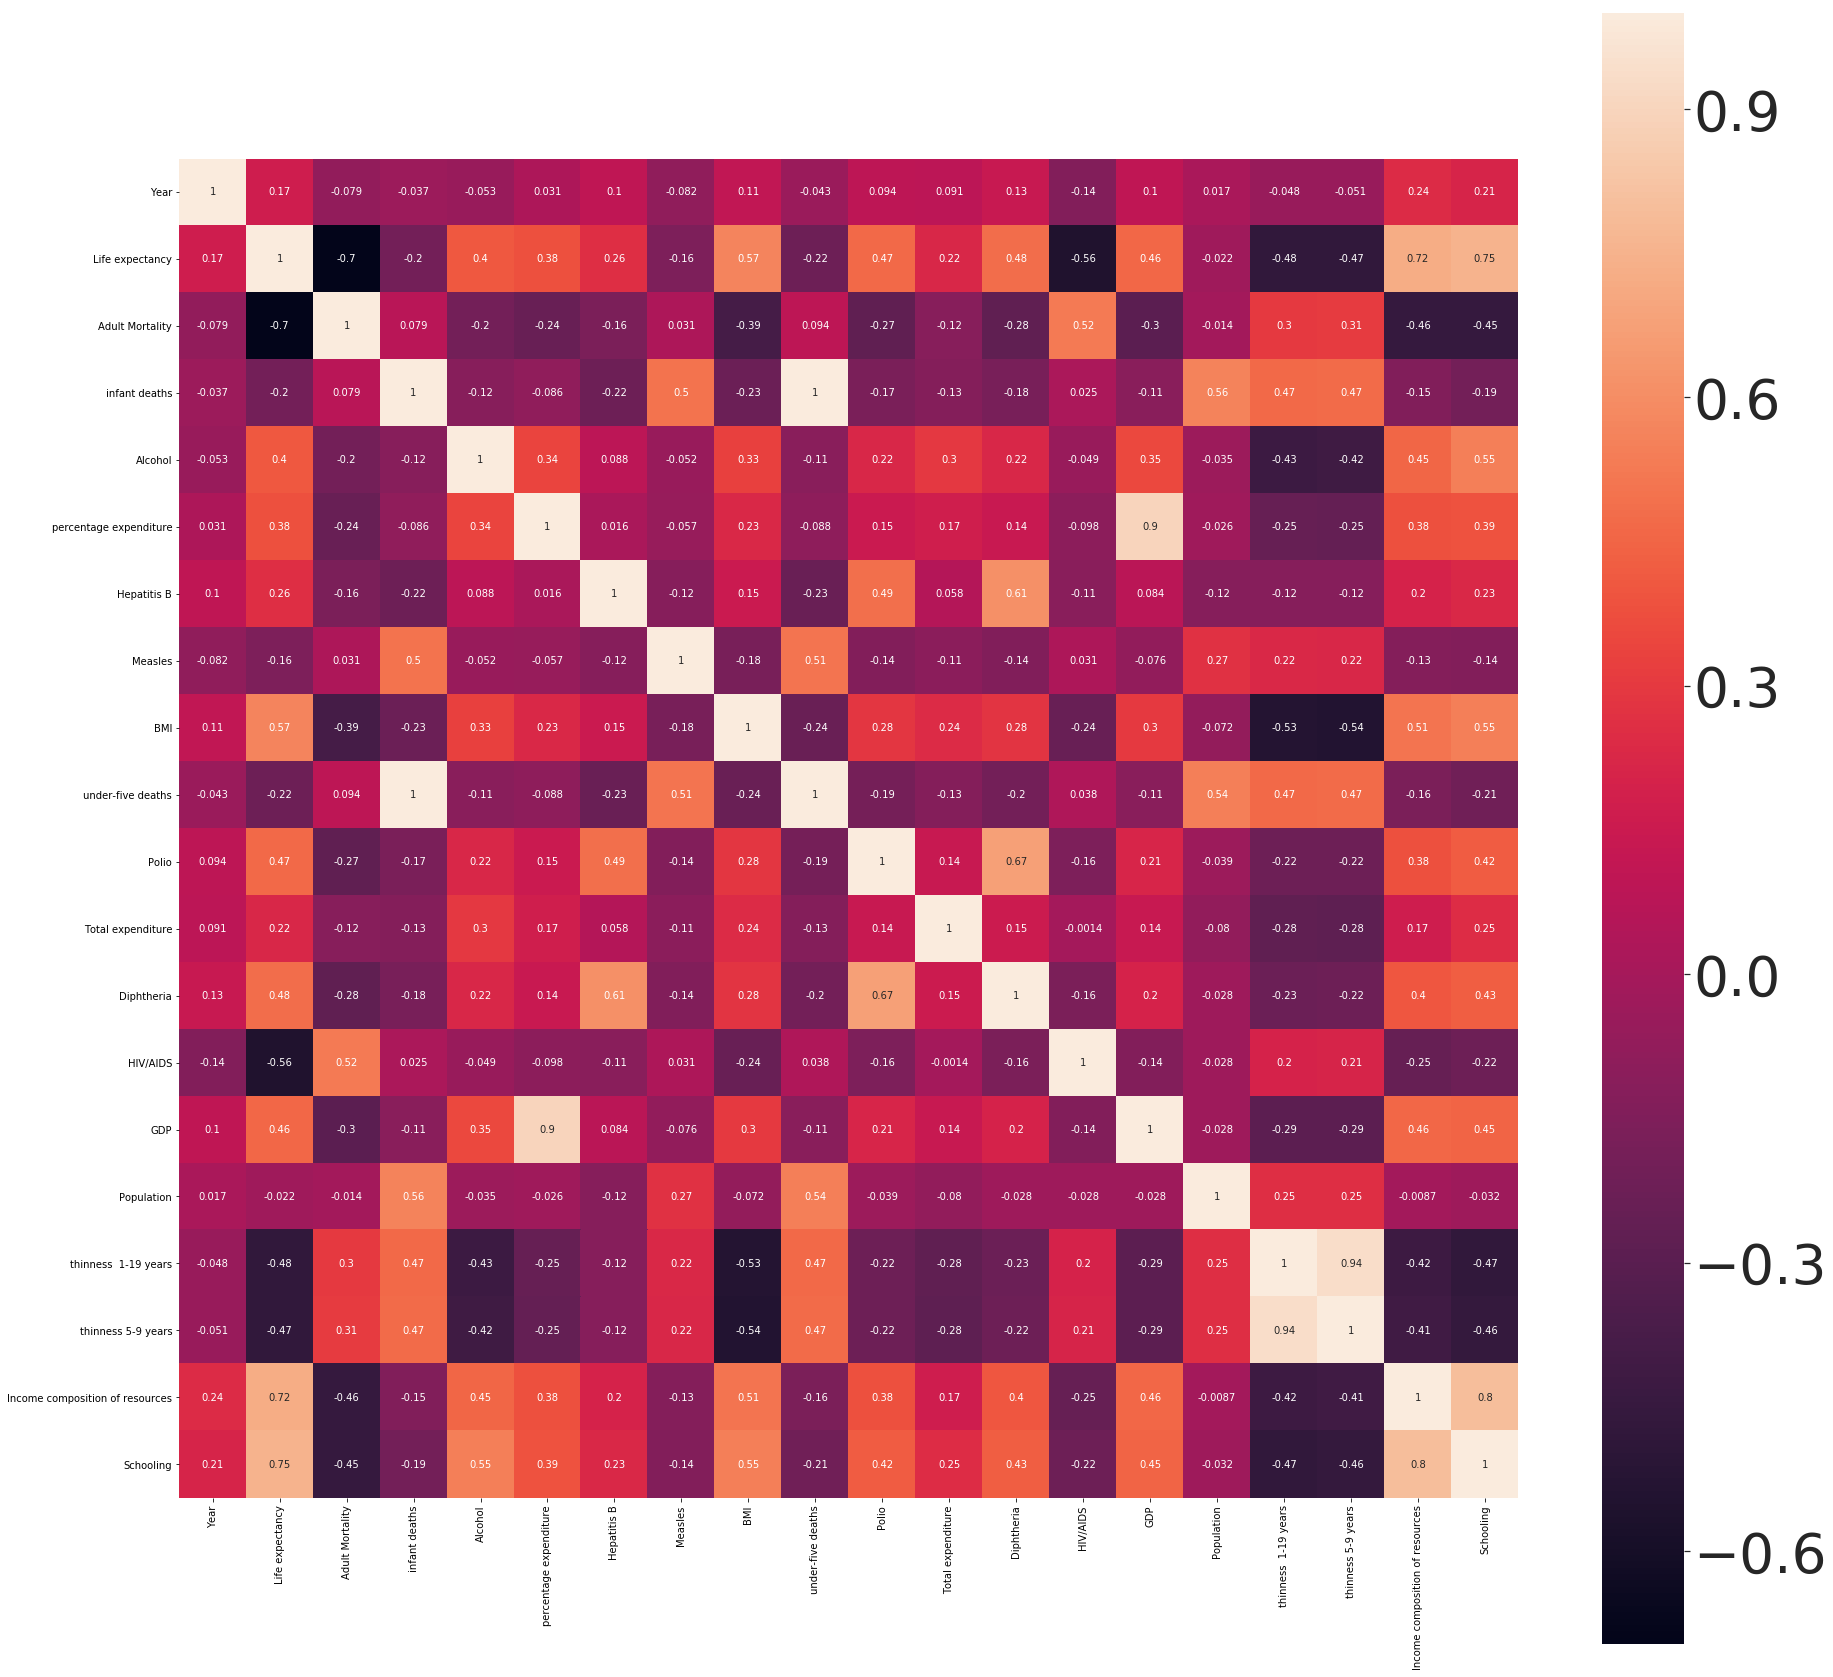

In [11]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})

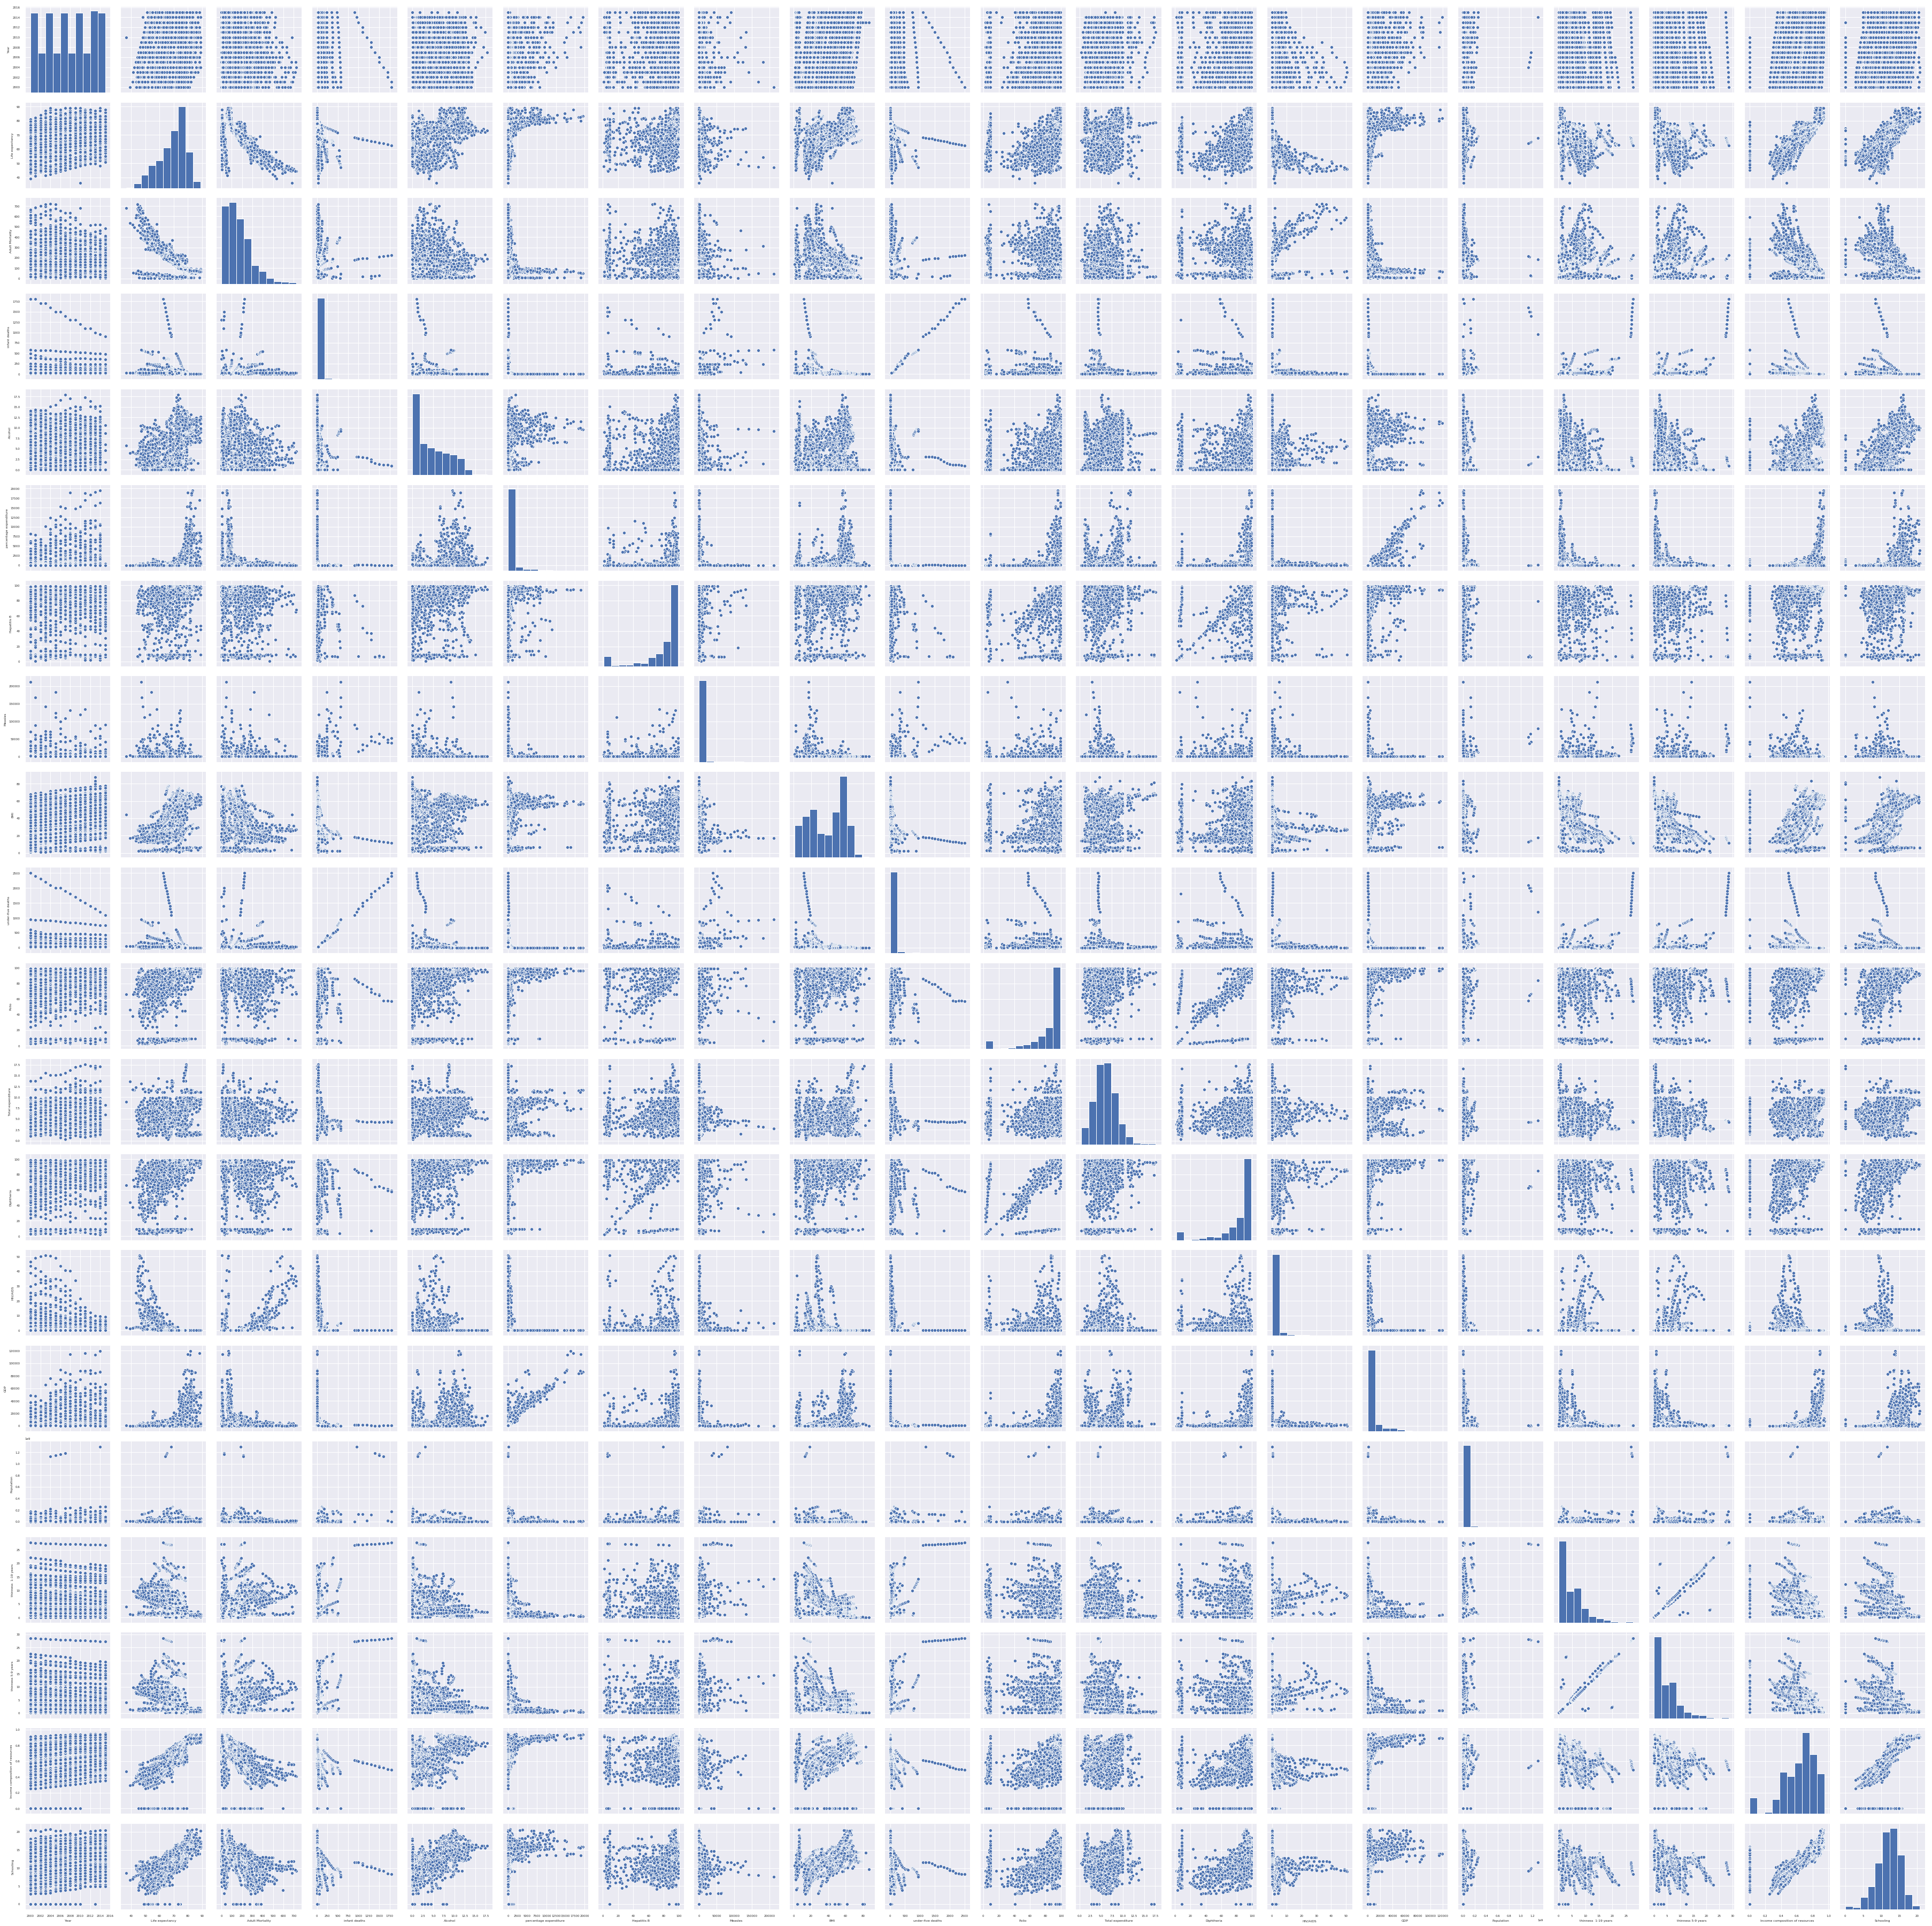

In [12]:
sns.set(font_scale=0.5)
sns.pairplot(df)

In [13]:
df.describe().transpose()

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
BMI                              2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
HIV/AIDS                         2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
thinness  1-19 years             2904.0  4.839704e+00  4.420195e+00   
thinness 5-9 years               2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
BMI                                 1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
HIV/AIDS                            0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
thinness  1-19 years                0.10000       1.600000  3.300000e+00   
thinness 5-9 years                  0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
BMI                              5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
HIV/AIDS                         8.000000e-01  5.060000e+01  
GDP            

In [14]:
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
BMI                                2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
HIV/AIDS                           2938
GDP                                2490
Population                         2286
thinness  1-19 years               2904
thinness 5-9 years                 2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [15]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
df=df.fillna(df.mean())

In [17]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2938
Adult Mortality                    2938
infant deaths                      2938
Alcohol                            2938
percentage expenditure             2938
Hepatitis B                        2938
Measles                            2938
BMI                                2938
under-five deaths                  2938
Polio                              2938
Total expenditure                  2938
Diphtheria                         2938
HIV/AIDS                           2938
GDP                                2938
Population                         2938
thinness  1-19 years               2938
thinness 5-9 years                 2938
Income composition of resources    2938
Schooling                          2938
dtype: int64

In [19]:
print(df['Life expectancy'])

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64


In [20]:
df.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [21]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [22]:
df['Status'] = df.Status.map({'Developing':0, 'Developed':1})
df.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       0             65.0            263.0             62   
1  Afghanistan  2014       0             59.9            271.0             64   
2  Afghanistan  2013       0             59.9            268.0             66   
3  Afghanistan  2012       0             59.5            272.0             69   
4  Afghanistan  2011       0             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0     0.01               71.279624         65.0     1154  ...    6.0   
1     0.01               73.523582         62.0      492  ...   58.0   
2     0.01               73.219243         64.0      430  ...   62.0   
3     0.01               78.184215         67.0     2787  ...   67.0   
4     0.01                7.097109         68.0     3013  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

Developing = 0, Developed=1 


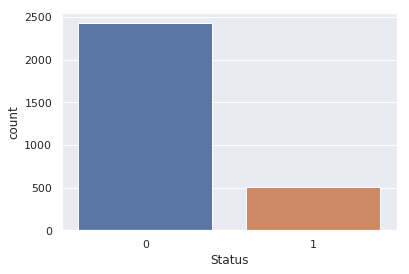

In [23]:
sns.set(font_scale=1)
sns.countplot(df['Status'])
print('Developing = 0, Developed=1 ')

In [24]:
df.drop(columns='Country',inplace=True)
df.head()

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015       0             65.0            263.0             62     0.01   
1  2014       0             59.9            271.0             64     0.01   
2  2013       0             59.9            268.0             66     0.01   
3  2012       0             59.5            272.0             69     0.01   
4  2011       0             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33736494.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  31731688.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 21 columns]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


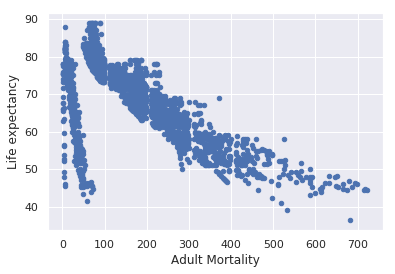

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


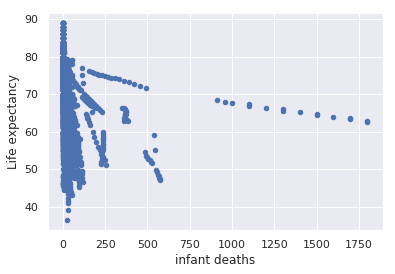

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


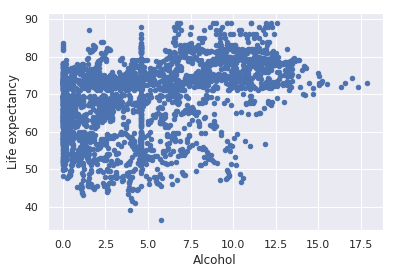

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


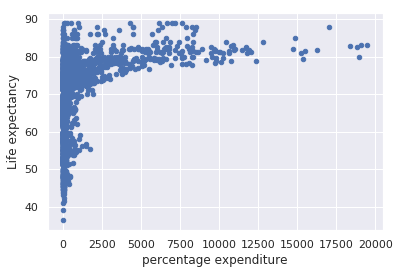

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


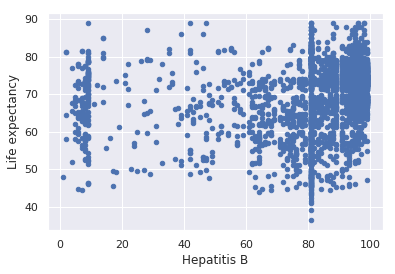

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


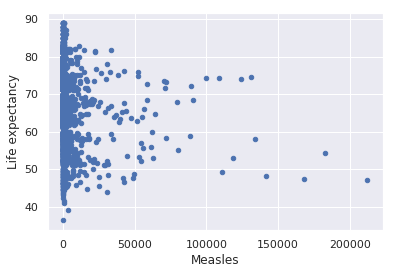

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


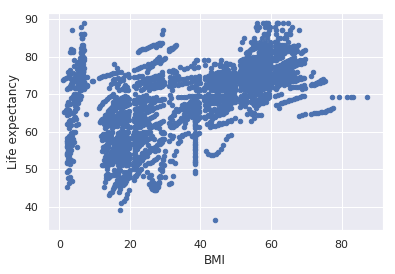

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


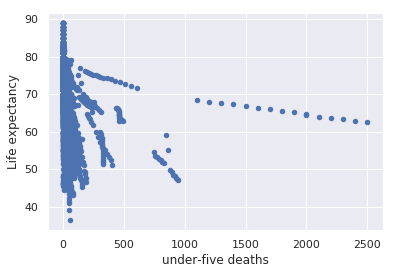

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


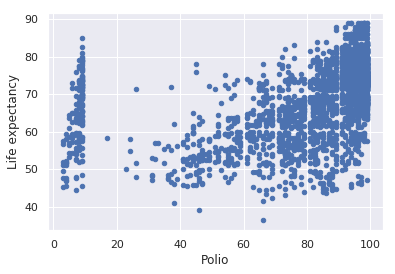

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


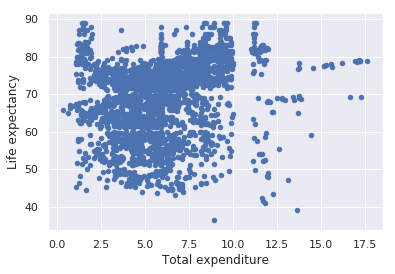

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


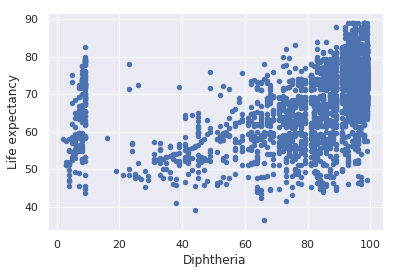

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


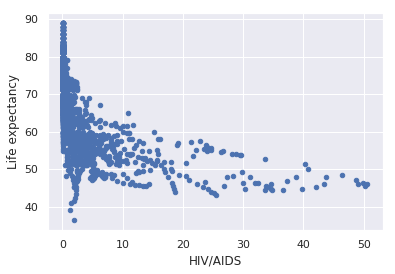

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


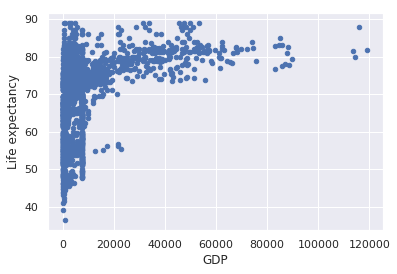

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


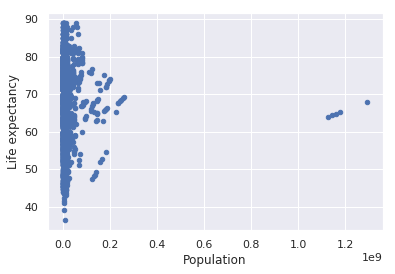

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


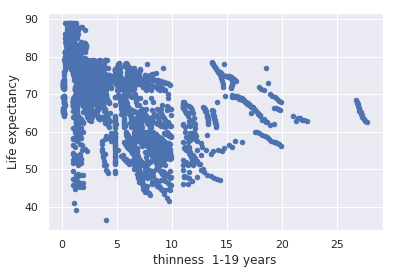

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


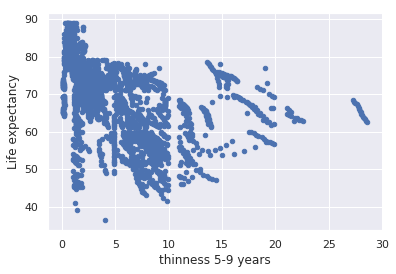

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


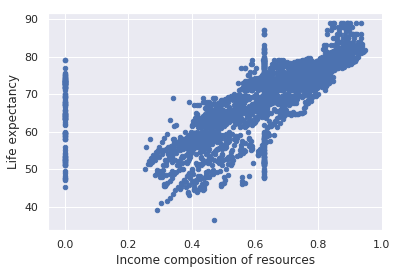

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


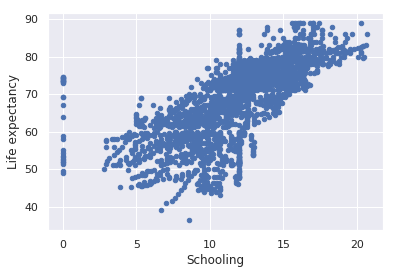

In [25]:
import matplotlib.pyplot as plot
cols=list(df.columns)
print(cols)

for i in cols[3:]:
    sns.set(font_scale=1)
    df.plot.scatter(x=i, y='Life expectancy')
    plot.show()

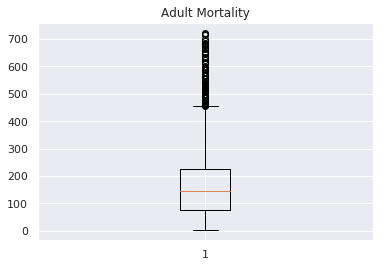

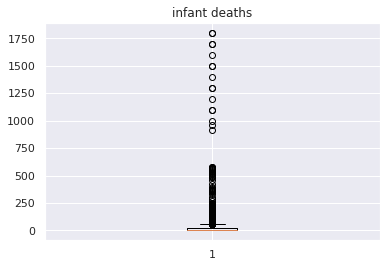

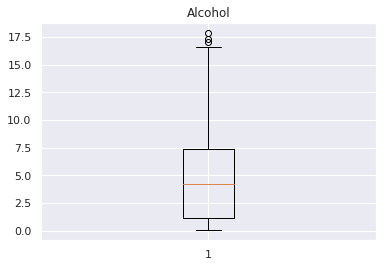

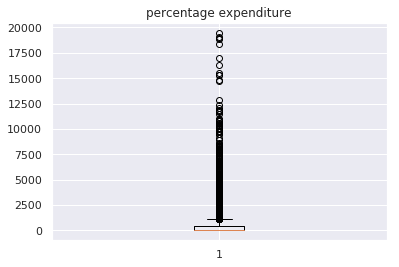

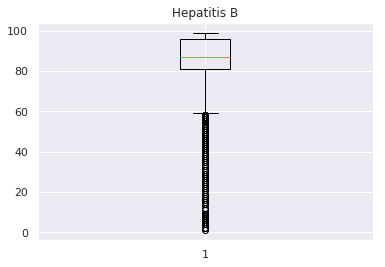

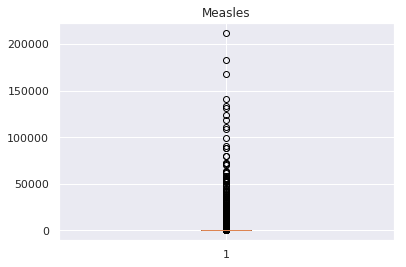

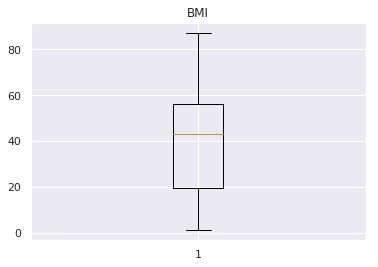

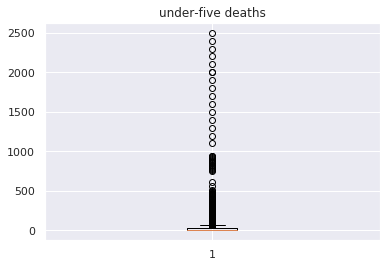

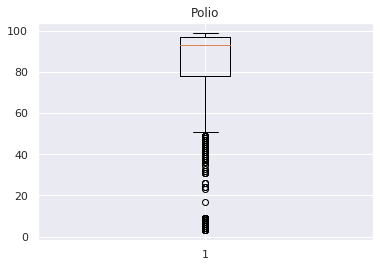

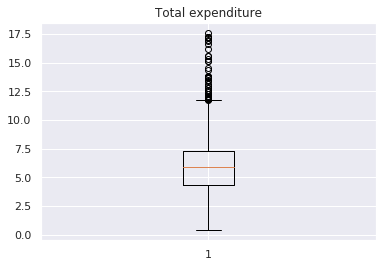

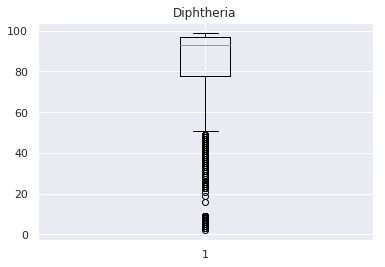

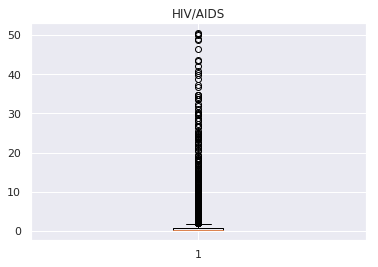

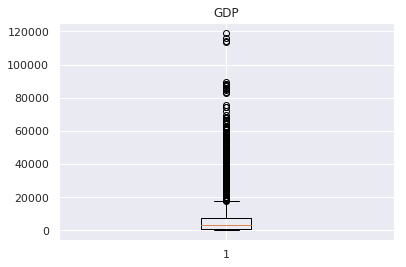

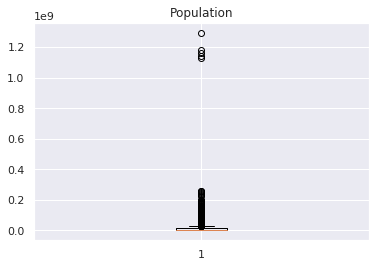

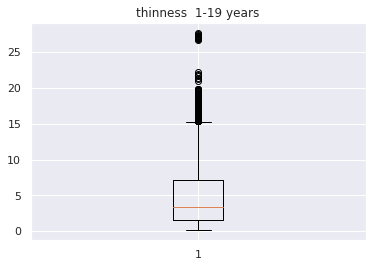

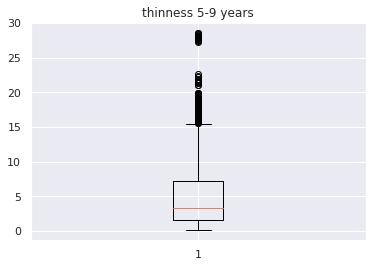

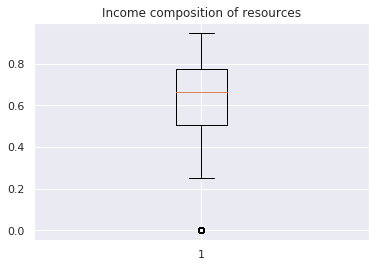

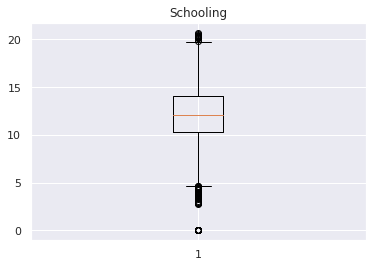

In [26]:
from scipy.stats.mstats import winsorize
for i in cols[3:]:
    plot.figure()
    plot.boxplot(df[i])
    plot.title(i)

In [27]:
out_col = {'Life expectancy':1, 'Adult Mortality':2,
       'infant deaths':3, 'Alcohol':4, 'percentage expenditure':5, 'Hepatitis B':6,
       'Measles':7, 'BMI':8, 'under-five deaths':9, 'Polio':10, 'Total expenditure':11,
       'Diphtheria':12, 'HIV/AIDS':13, 'GDP':14, 'Population':15,
       'thinness  1-19 years':16, 'thinness 5-9 years':17,
       'Income composition of resources':18, 'Schooling':19}

for variable in out_col.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlines_Values = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    
    print("Outliers in {} = {}".format(variable, outlines_Values))

Outliers in Life expectancy = 17
Outliers in Adult Mortality = 86
Outliers in infant deaths = 315
Outliers in Alcohol = 3
Outliers in percentage expenditure = 389
Outliers in Hepatitis B = 316
Outliers in Measles = 542
Outliers in BMI = 0
Outliers in under-five deaths = 394
Outliers in Polio = 279
Outliers in Total expenditure = 51
Outliers in Diphtheria = 298
Outliers in HIV/AIDS = 542
Outliers in GDP = 300
Outliers in Population = 194
Outliers in thinness  1-19 years = 100
Outliers in thinness 5-9 years = 99
Outliers in Income composition of resources = 130
Outliers in Schooling = 77


In [28]:
from scipy.stats.mstats import winsorize
df['Life expectancy']= winsorize(df['Life expectancy'],(0.01,0))
df['Adult Mortality'] = winsorize(df['Adult Mortality'],(0,0.03))
df['infant deaths'] = winsorize(df['infant deaths'],(0,0.10))
df['percentage expenditure'] = winsorize(df['percentage expenditure'],(0,0.12))
df['under-five deaths'] = winsorize(df['under-five deaths'],(0,0.12))
df['Polio'] = winsorize(df['Polio'],(0.09,0))
df['Diphtheria'] = winsorize(df['Diphtheria'],(0.10,0))
df['HIV/AIDS'] = winsorize(df['HIV/AIDS'],(0,0.16))
df['GDP']= winsorize(df['GDP'],(0,0.13))
df['Population']= winsorize(df['Population'],(0,0.14))
df['thinness  1-19 years']= winsorize(df['thinness  1-19 years'],(0,0.04))
df['thinness 5-9 years']= winsorize(df['thinness 5-9 years'],(0,0.04))
df['Income composition of resources']= winsorize(df['Income composition of resources'],(0.05,0))
df['Schooling']= winsorize(df['Schooling'],(0.02,0.01))

In [29]:
for variable in out_col.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlines_Values = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    
    print("Outliers in {} = {}".format(variable, outlines_Values))

Outliers in Life expectancy = 0
Outliers in Adult Mortality = 0
Outliers in infant deaths = 315
Outliers in Alcohol = 3
Outliers in percentage expenditure = 389
Outliers in Hepatitis B = 316
Outliers in Measles = 542
Outliers in BMI = 0
Outliers in under-five deaths = 394
Outliers in Polio = 279
Outliers in Total expenditure = 51
Outliers in Diphtheria = 298
Outliers in HIV/AIDS = 542
Outliers in GDP = 0
Outliers in Population = 0
Outliers in thinness  1-19 years = 0
Outliers in thinness 5-9 years = 0
Outliers in Income composition of resources = 0
Outliers in Schooling = 64


In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['Life expectancy'], axis = 1)
X.head()

Year  Status  Adult Mortality  infant deaths  Alcohol  \
0  2015       0            263.0             58     0.01   
1  2014       0            271.0             58     0.01   
2  2013       0            268.0             58     0.01   
3  2012       0            272.0             58     0.01   
4  2011       0            275.0             58     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 79   
1               73.523582         62.0      492  18.6                 79   
2               73.219243         64.0      430  18.1                 79   
3               78.184215         67.0     2787  17.6                 79   
4                7.097109         68.0     3013  17.2                 79   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP    Population  \
0   47.0               8.16        65.0       0.1  584.259210  1.275338e+07   
1   58.0               8.18        62.0       0.1  612.696514  3.275820e+05   
2   62.0               8.13        64.0       0.1  631.744976  1.275338e+07   
3   67.0               8.52        67.0       0.1  669.959000  3.696958e+06   
4   68.0               7.87        68.0       0.1   63.537231  2.978599e+06   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  14.6                15.0                            0.479   
1                  14.6                15.0                            0.476   
2                  14.6                15.0                            0.470   
3                  14.6                15.0                            0.463   
4                  14.6                15.0                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [31]:
Y = df['Life expectancy']
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(X.shape, Y.shape)

(2938, 20) (2938,)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 non-null

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
rf_pred=rf.predict(X_test)
rf_pred

array([77.837     , 66.673     , 52.962     , 57.169     , 56.065     ,
       69.19724932, 72.11474249, 82.442     , 73.85149863, 51.554     ,
       66.076     , 82.631     , 75.186     , 76.661     , 63.875     ,
       74.286     , 56.715     , 63.979     , 72.976     , 83.1       ,
       74.055     , 71.91      , 73.142     , 80.794     , 70.2244959 ,
       61.399     , 82.507     , 73.54924932, 72.554     , 72.529     ,
       74.834     , 55.402     , 78.301     , 74.879     , 75.408     ,
       72.939     , 72.69624932, 82.287     , 59.989     , 73.632     ,
       59.858     , 75.864     , 80.148     , 72.819     , 73.933     ,
       79.447     , 55.352     , 74.095     , 53.483     , 80.26824932,
       74.286     , 57.598     , 73.622     , 72.368     , 72.65924932,
       71.99524932, 81.968     , 74.363     , 56.104     , 72.292     ,
       67.75024932, 73.151     , 80.031     , 68.727     , 61.343     ,
       74.866     , 69.043     , 72.96      , 48.238     , 74.31

In [36]:
Y_test

867     77.3
1780    66.6
621     52.6
2715    61.5
2717    60.0
2855    69.3
1410    71.1
933     81.5
2572    74.3
1376    51.9
1554    65.5
503     87.0
672     76.9
22      76.1
298     65.0
1588    74.6
2718    59.3
338     64.2
1311    73.0
1540    81.4
1615    71.8
1724    65.9
30      73.6
2518    79.9
2541    71.7
2614    62.0
1846    81.5
305     74.0
454     72.4
572     73.1
        ... 
2483    68.9
2909    59.2
2789    51.5
791     75.0
768     57.4
1628    53.6
517     49.2
2804    77.5
1894    53.6
981     74.2
581     73.6
459     71.4
1051    71.7
303     62.0
132     88.0
1835    86.0
1099    54.4
526     45.6
1183    84.0
144     72.7
934     81.7
2585    75.7
775     72.7
204     66.8
41      73.4
2800    78.5
2852    69.9
2323    82.0
1775    54.0
2859    73.9
Name: Life expectancy, Length: 735, dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean absolute error(MAE) : ' +str(mean_absolute_error(Y_test, rf_pred)))
print('Mean Square Error (MSE) :  ' +str(mean_squared_error(Y_test, rf_pred)))
print('Quadratic mean (RMSE): ' +str(np.sqrt(mean_squared_error(Y_test,rf_pred))))

Mean absolute error(MAE) : 1.2255519859856514
Mean Square Error (MSE) :  3.888058800342064
Quadratic mean (RMSE): 1.9718161172741397


In [38]:
print("Training accuracy: " +str(rf.score(X_train, Y_train)))
print("Testing accuracy:  " +str(rf.score(X_test, Y_test)))

Training accuracy: 0.9945932411567763
Testing accuracy:  0.9578983691309393


In [41]:
rf.score(X_test,Y_test)

0.9578983691309393

In [59]:
from sklearn.metrics import r2_score
rfscore = r2_score(Y_test, rf_pred)
print("R-2 score is: " +str(rfscore))

R-2 score is: 0.9578983691309393


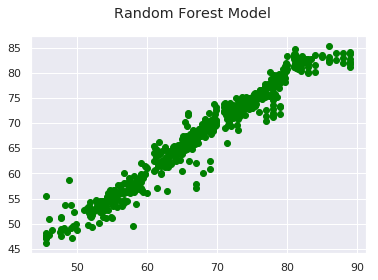

In [60]:
plot.figure().suptitle('Random Forest Model')
plot.scatter(Y_test,rf_pred, color = 'green')

In [61]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [62]:
wml_credentials={
  "apikey": "Zw8MJeTVLo3448prtul75QmUgjt-eMTnRy5Ro82s77nX",
  "instance_id": "4bcdb6df-7169-4e82-b25a-c03feba8fc3d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [63]:
client = WatsonMachineLearningAPIClient( wml_credentials )
print(client.service_instance.get_url())

https://eu-gb.ml.cloud.ibm.com


In [64]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "saketh", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "cholletisaketh@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_Expectency_Prediction"}

In [65]:
model_artifact =client.repository.store_model(rf, meta_props=model_props)
Deploy_Model_uid= client.repository.get_model_uid(model_artifact)
Deploy_Model_uid

'e42ecbb8-26af-4a52-bc2a-fcd18e425976'

In [ ]:
Model_deployment = client.deployments.create(Deploy_Model_uid, name="Life Expectency Prediction")



#######################################################################################

Synchronous deployment creation for uid: 'e42ecbb8-26af-4a52-bc2a-fcd18e425976' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS

In [ ]:
scoring_endpoint = client.deployments.get_scoring_url(Model_deployment)
print("Model Deployment End-Point : " +str(scoring_endpoint))